# 파이썬으로 배우는 기계학습
# Machine Learning with Python
**************

# 제 2-2 강: 넘파이$^{Numpy}$ 튜토리얼(1/2)

## 학습 목표
기계학습에서 왜 넘파이를 사용하는지 이해하고, 넘파이 개념과 기본적인 사용법을 익힌다.

## 학습 내용
1. 넘파이의 특징
2. 왜 넘파이인가? 
3. 배열의 속성
4. 배열의 인덱싱과 슬라이싱
5. 배열/행렬의 연산

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def pprint(arr):
    print("type:{}, size:{}".format(type(arr), arr.size))
    print("shape:{}, ndim/rank:{}, dtype:{}".format(arr.shape, arr.ndim, arr.dtype))
    print("Array's Data:")
    print(arr)

## 1. 넘파이의 특징
NumPy는 '넘파이'라고 읽고, NumPy쓰는 것이 정석입니다. 파이썬 기반 데이터 분석 환경에서 넘파이는 행렬 연산을 위한 핵심 라이브러리입니다. NumPy는 “Numerical Python“의 약자로 대규모 다차원 배열과 행렬 연산에 필요한 다양한 함수를 제공합니다. 파이썬 list 클래스를 개선하여 만든 Numpy의 ndarray 클래스를 사용하면 더 많은 데이터를 더 빠르게 처리할 수 있습니다. 메모리 버퍼에 배열 데이터를 저장하고 처리하는 효율적인 인터페이스를 제공합니다. 

Numpy는 다음과 같이 기계학습를 구현하는데 상당히 유용한 특징을 갖고 있습니다.

- 강력한 N 차원 배열 객체
- 정교한 브로드케스팅(Broadcast) 기능
- 다양한 선형 대수학 함수와 난수 기능
- 범용적 데이터 처리에 사용 가능한 다차원 컨테이너
- C/C ++ 및 Fortran 코드 통합 도구

파이썬에서 Numpy를 사용할 때, 다음과 같이 numpy 모듈을 “np”로 임포트하여 사용합니다. np로 임포트 하지 않으면, numpy를 사용해야 합니다. Numpy 라이브러리 버전은 다음과 같이 확인 할 수 있습니다.

In [2]:
import numpy
numpy.__version__

'1.16.2'

In [3]:
import numpy as np
np.__version__

'1.16.2'

## 2. 왜 넘파이인가?

Numpy를 사용하면, 다차원 행렬 연산을 손쉽게 할 수 있습니다. 특히, 앞으로 살펴볼 신경망에서 가중치를 계산하게 될 것입니다. 신경망이 복잡해지고 수행해야할 연산이 많아질수록 Numpy를 사용한 연산이 빛을 발하게 됩니다. 하나의 예제를 통해 행렬 연산을 사용해야 하는 이유를 보여드리겠습니다.

다음 셀에서는 일천만개의 가중치 w와 입력값 x를 초기화합니다. 그리고, 
1. 한 경우는 파이썬 list 형식의 w, x에 값을 저장하고, 또
2. 한 경우는 Numpy배열 형식의 w_numpy, x_numpy 에 저장합니다.

In [4]:
import numpy as np
n = 10000000
w = []                # list type
x = []
for i in range(n):
    w.append(i*0.00001)
    x.append(i*0.00002)

w_numpy = np.array(w)  # ndarray type
x_numpy = np.array(x)

다음 두 셀은 각각의 데이터 구조에 저장된 입력과 가중치를 곱한 값, 즉 $wx$ 의 연산 속도를 보여줍니다. 

주피터 노트북의 셀 매직 커맨드인 `%%timeit`은 해당 셀을 수행하는데 사용된 시간을 보여줍니다. `time` 커맨드에 대한 자세한 설명은 [링크]( http://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-time)를 통해 확인할 수 있습니다. 

In [6]:
%%timeit
total = 0
for i in range(n):
    total += w[i]*x[i]

1.88 s ± 184 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
%%timeit
total_numpy = np.dot(w_numpy, x_numpy)

11.6 ms ± 212 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


여러분의 컴퓨터 CPU 사양에 따라서 연산속도에는 차이가 있을 것입니다. 제가 사용하는 노트북의 환경에서는 넘파이를 사용한 연산이 비교할 수 없는 정도로 빠르다는것을 확일할 수 있습니다. 그 이유는 기존의 파이썬 리스트를 사용해서 연산을 할 경우 for 반복문이 한줄 한줄 실행되는 반면에, 넘파이 어레이를 사용할 경우 동시에 다양한 연산을 할 수 있기 때문입니다.

자, 그러면, 우리가 Numpy를 열공할 이유가 충분한가요? 

Numpy 배열의 속성부터 알아보도록 하겠습니다. 

In [8]:
1.8/0.016

112.5

## 3. Numpy 배열 속성 - shape, rank, axis, ndim, size

Numpy배열은 ndarray 클래스입니다. ndarray 클래스는 다음과 같은 속성이 있습니다. 

- ndim -- 차원, 축(axis)의 개수. 축의 갯수를 랭크(rank)라 부릅니다. (그림 1)에서 3D배열은 랭크가 3입니다.
- shape -- 형상, 각 차원에서 배열의 사이즈를 표시하는 튜플입니다. n 행과 m 열을 갖는 매트릭스를 예를들면 shape 은 (n,m) 입니다. shape튜플의 길이는 랭크입니다. (그림 1)에서 3D배열의 형상은 (2, 2, 3)
- size -- 배열의 모든 원소들의 개수입니다. shape의 원소들의 모두 곱한 값과 같습니다. (그림 1)에서 3D배열의 크기는 12입니다. 
- dtype -- 배열 원소들의 자료 형식, 예를 들면 numpy.int32, numpy.int16, and numpy.float64 입니다.

이러한 속성들을 알고 있으면, 강의를 들을 때, 코딩할 때, 문서를 참조할 때 상당히 도움이 됩니다. 

예를 들어 28x28 컬러 사진은 높이가 28, 폭이 28, 각 픽셀은 3개 채널(RGB)로 구성된 데이터 구조를 갖습니다. 즉 컬러 사진 데이터는 형상은 (28, 28, 3)인 3차원 배열이므로 rank 즉 ndim = 3입니다. 그러므로, axis = 0, 1, 2 세 축이 존재합니다. 이와 같은 다차원 배열은 입체적인 데이터 구조를 가지며, 데이터의 차원은 여러 갈래의 데이터 방향을 갖습니다. 다차원 배열의 데이터 방향을 axis로 표현할 수 있습니다. 

행방향(높이, row), 열방향(폭, column), 채널 방향은 각각 axis=0, axis=1 그리고 axis=2로 지정됩니다. Numpy 집계$^{aggregation}$ 함수는 배열 데이터의 집계 방향을 지정하는 axis 옵션을 제공합니다. 집계 함수에는 sum, mean, std, min, max, argmax, median 등등이 있습니다. 

<img src="images/ndarray.png" width="500">
<center>그림 1: Numpy 1차원, 2차원 및 3차원 배열과 Axis</center>

## 4. 배열의 생성과 출력

배열의 속성이 좀 복잡하죠?  그래서, 배열의 속성을 출력하는 함수를 만들어 보았습니다. 

In [12]:
def pprint(arr):
    print("type:{}, size:{}".format(type(arr), arr.size))
    print("shape:{}, ndim/rank:{}, dtype:{}".format(arr.shape, arr.ndim, arr.dtype))
    print("Array's Data:")
    print(arr)

### 4.1 1차원 배열 생성

먼저 0부터 11까지 나열된 1차원의 배열을 만들고, 속성을 출력해 봅니다. 파이썬 리스트와 보기는 비슷하지만 출력도 좀 다른 것에 유의하길 바랍니다. 

In [13]:
import numpy as np
a = np.arange(12)
pprint(a)

type:<class 'numpy.ndarray'>, size:12
shape:(12,), ndim/rank:1, dtype:int32
Array's Data:
[ 0  1  2  3  4  5  6  7  8  9 10 11]


배열을 생성할 때는 하나의 리스트를 인자로 제공해야 합니다. 예를 들면, 
`
a = np.array(1,2,3,4)    # wrong
a = np.array([1,2,3,4])  # right - list
a = np.array((1,2,3,4))  # right - tuple
`

### 4.2 배열의 형식과 형상

배열을 생성할 때 배열의 형식$^{type}$과 형상$^{shape}$을 지정할 수 있습니다. shape을 모양이라고 번역하기도 합니다.  다음은 구문은 배열은 float 형식이며, 행(axis 0)이 3이고 열(axis 1)은 나머지는 알맞게 맞추라는 것입니다. 물론, -1 대신에 4를 사용하면 분명하고 좋습니다. 

In [ ]:
a = np.arange(12, dtype=float).reshape(None)
pprint(a)

### 4.3 배열의 생성 함수

배열에 형상을 지정하면, 원소의 값을 초기화해주는 다양한 함수들이 있습니다. 
- zeros -- 지정된 shape의 배열을 생성하고, 원소를 모두 0으로 초기화
- ones -- 지정된 shape의 배열을 생성하고, 원소를 모두 1로 초기화
- full -- 지정된 shape의 배열을 생성하고, 원소를 모두 지정한 한 값으로 초기화
- empty -- 지정된 shape의 배열을 생성하고, 원소들 모두 임의의 값으로 초기화
- eye -- 주 대각선의 모든 원소가 1인 단위 행렬(Unit Matrix)을 생성

In [17]:
# all 1's numpy array
np.ones((3, 4))

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [20]:
np.eye(5,5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

### 4.4 데이터 생성 함수

사용자가 정하는 조건으로 데이터를 생성한 후, 배열을 만들어 반환하는 함수들입니다. 

- `arange([start,] stop[, step,], dtype=None)` <br>
  start부터 stop 미만까지 step 간격으로 데이터 생성하여 배열을 반환
- `linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)` <br>
  start부터 stop의 범위에서 num 개의 데이터를 균일한 간격으로 생성하고 배열을 반환  
- `logspace(start, stop, num=50, endpoint=True, base=10.0, dtype=None)` <br>
  start부터 stop의 범위에서 로그 스케일로 num 개의 데이터를 균일한 간격으로 생성하고 배열을 반환

In [21]:
a = np.arange(10)
pprint(a)

type:<class 'numpy.ndarray'>, size:10
shape:(10,), ndim/rank:1, dtype:int32
Array's Data:
[0 1 2 3 4 5 6 7 8 9]


Draw a list of number stored in `a` in red dots. Use an option `'or'` in plot().

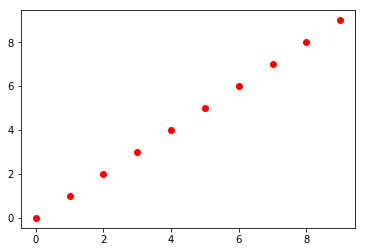

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(a, 'or')
plt.show()

In [25]:
x = np.linspace(0, 2*np.pi)
y = np.sin(x)

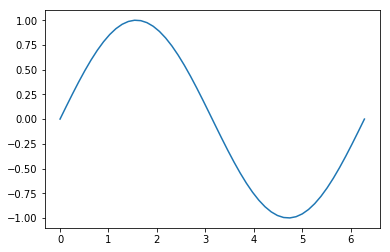

In [26]:
plt.plot(x, y)
plt.show()

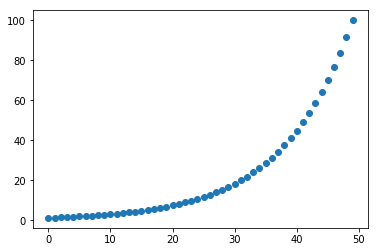

In [27]:
a = np.logspace(0.1, 2)
plt.plot(a, 'o')
plt.show()

## 5. 인덱싱과 슬라이싱

기계학습을 하면서, 다차원 배열을 부분적으로 다루어야 할 때가 많습니다. 인덱싱과 슬라이싱이 필요한 것입니다. 

배열의 인덱싱은 0부터 시작하고, 또한 음수 인덱싱도 가능하여 배열의 끝은 -1부터 시작합니다. 또한 범위를 지정할 때, 콜론(:)을 사용합니다. 예를 들어, `[:, :]` 2차원 배열의 모든 행과 열을 나타내고, `[:2]`는 배열의 0, 1의 행, `[:, 1:3]`은 1, 2열을 나타냅니다. 일반적으로 파이썬에서 범위(인덱싱)를 지정할 때 범위의 끝은 포함하지 않습니다. 

<img src="images/ndarray-indexing.png" width="500">
<center>그림 2: Numpy 배열 인덱싱</center>

인덱싱 연습을 위해, 1 부터 12까지 수로 이루어진 형상이 (3, 4)인 배열을 생성해 봅시다. 

In [ ]:
import numpy as np
np_arr = np.arange(1, 13).reshape(None)
print(np_arr)

#### 원소 인덱싱
원소 하나씩 접근하는 것은 일반적인 배열 인덱싱과 같습니다. 다만, 파이썬의 특이한 점은 인덱싱으로 음수를 사용하며, -1은 배열의 끝을 나타냅니다. 그러므로, 원소 12의 인덱싱은 `[-1, -1]`이며, 이런 인덱싱은 2차원 배열의 크기가 바뀔지라도 항상 마지막 원소를 가리키는 편리함이 있습니다.

In [ ]:
np_arr[-1, -1]  

#### 행, 열 인덱싱
행의 인덱싱은 행의 인덱스로만 가능하지만, 열을 인덱싱할 때는 행의 위치에 콜론(:)을 지정해야 합니다.  다음은 배열 `np_arr`의 첫째 행과 열을 인덱싱합니다

In [ ]:
print(np_arr[0])
print(np_arr[:,0])

다음과 같이 배열 `np_arr`의 마지막 행과 열을 인덱싱합니다

In [ ]:
print(np_arr[None])
print(np_arr[None)

### 5.1 슬라이싱
콜론(:)을 사용하여 start:end와 같이 범위를 지정할 수 있습니다. end는 자신을 포함하지 않고, start가 생략이 되면 0부터를 의미하며, end가 생략되면 끝까지를 의미합니다. 

자, 그러면 위 왼쪽 코너의 4개의 원소 즉 `[[1, 2], [5,6]]`와 아래 오른쪽 코너 4개의 원소 즉 `[[7, 8], [11,12]]`를 슬라이싱하여 각각 b, c에 저장을 시도하겠습니다.
<img src="images/ndarray-indexing1.png" width="200">
<center>그림 2: Numpy 배열 인덱싱</center>

In [ ]:
data = np.array([[1, 0, 0, 0], [1, 0, 1, 1], [1, 1, 0, 1], [1, 1, 1, 0]])
print(data)
X, y = data[:, :3], data[:, 3]
print('X', X)
print('y', y)

다음은 배열의 원소 6, 7를 인덱싱하여 출력하는 한 방법입니다.

In [ ]:
np_arr = np.arange(1, 13).reshape(3, 4)
print(np_arr)
print(np_arr[None])

다음은 배열의 가장자리의 행과 열을 제외한 나머지 배열을 인덱싱하는 방법입니다. 

In [ ]:
np_arr = np.arange(1, 31).reshape(5, 6)
print(np_arr)
print(np_arr[None])

In [ ]:
np_arr = np.arange(1, 25).reshape(3, 8)
print(np_arr)
print(np_arr[None])

### 5.2 서브배열은 원 배열의 view(뷰) 

제목이 무슨 말인지 이해가 가지 않지만 그대로 진행해 봅시다. 여기서 원 배열은 `a` 배열입니다.

`b`의 첫 원소를 값을 `99`으로 바꾸고 `b`를 출력하고, `a`를 출력해봅시다. 그러면, `a` 배열도 수정된 것을 볼 수 있습니다. 유의해야 할 점입니다. 이러한 사실을 간과하면, 언제가 몇 시간이나 며칠 동안 디버깅을 해야 할지도 모릅니다. 

In [ ]:
a = np.arange(1, 13).reshape(3,4)
b = a[:2, :2]
print(b)
b[0, 0] = 99
print(a)

원 배열에서 일부 잘라낸 배열을 서브배열$^{subarray}$라고 부르는 이유가 여기에 있습니다. 

view(뷰)라는 말은 무슨 말인가요? C프로그래밍의 포인터 개념입니다. 포인터가 가리키고 있는 내용을 바꾸면 원래의 저장된 변수의 내용이 바뀌는 것과 같습니다. 

### 5.3 배열의 복사

배열을 복사할 때도 조심해야 합니다. 다음과 같이 `aa = a`를 하여 `a`를 복사했다고 생각하면 잘못입니다. 여기서 `aa`도 역시 view(뷰)입니다. 

In [ ]:
a = np.arange(1, 13).reshape(3,4)
aa = a
aa[0, 0] = 99
print(a)

그러면, 배열의 복사는 어떻게 해야 합니까? 배열 ndarray클래스가 제공하는 copy()메소드를 사용해야 합니다. 

In [ ]:
a = np.arange(1, 13).reshape(3,4)
aa = a.copy()
aa[0, 0] = 99
print(a)

### 5.4 행이나 열을 슬라이싱하기
두 가지 방법이 있습니다. 하나는 1차원 배열로 하는 방법 또 하나는 2차원 배열로 슬라이싱하는 방법입니다. 

1. 두 번째 행(`[5 6 7 8]`)을 슬라이싱할 때 (4,) 혹은 (1, 4) 형상으로 슬라이싱하는 방법이 있습니다. 
2. 두 번째 열(`[2 6 10]`)을 슬라이싱할 때도, (3,) 혹은 (3, 1) 형상으로 슬라이싱하는 방법이 있습니다. 

In [ ]:
a = np.arange(1, 13).reshape(3,4)
row1 = a[1]      # shape(4,)
print(row1)

In [ ]:
a = np.arange(1, 13).reshape(3,4)
row1 = a[1, :]      # shape(4,), sames as a[1]
row2 = a[1:2, :]    # shape(1, 4), same as a[1:2]
print(row1)
print(row2)

In [ ]:
col1 = a[:, 1]      # shape(3,)
col2 = a[:, 1:2]    # shape(3, 1)
print(col1)
print(col2)

### 5.5 불린$^{Boolean}$ 배열 인덱싱

기계학습에서 종종 사용되는 인덱싱입니다. 어떤 조건을 만족하는 배열의 원소를 선택할 때 사용합니다. 분류를 한 결과가 배열로 저장되어 있을 때, 어떤 임계값보다 큰 모든 원소의 갯수나 인덱스를 구할 수 있습니다.

난수로 이루어진 배열에서 0.6 이상인 원소의 갯수와 인덱스를 찾아내는 코드입니다.  

In [ ]:
a = np.random.random(12)  # np.random.random(12).reshape(3,4)
index = a > 0.6
print(index)
print(np.sum(index))
print(np.argwhere(index))

## 6. 배열/행렬 연산

행렬은 여러 벡터로 구성된 데이터 셋입니다. 하나의 벡터 안에는 원소의 값이 같은 형식(type)이며, 이러한 벡터를 여러 개 모은 것이 행렬입니다. 원소가 3개인 벡터가 2개 있으면 2행, 3열의 행렬, 2x3 행렬입니다.  

### 6.1 원소별 사칙 연산

$ \left\lgroup \matrix{1 & 2\cr 3 & 4} \right\rgroup 
+ \left\lgroup \matrix{5 & 6\cr 7 & 8} \right\rgroup
= \left\lgroup \matrix{1+5 & 2+6\cr 3+7 & 4+8} \right\rgroup $

In [ ]:
import numpy as np

A = np.array([[1, 2],[3, 4]])
B = np.array([[5, 6],[7, 8]])

In [ ]:
print(A + B)

In [ ]:
print(A - B)

In [ ]:
print(A * B)

In [ ]:
print(A / B)

### 6.2 행 벡터와 열 벡터

선형 대수학에서, 열 벡터는 열 행렬 mx1 행렬, 즉 m 원소들의 구성된 단일 열 행렬이며 다음과 같이 표시합니다. 
\begin{align} \mathbf{x} = \begin{pmatrix} x_1 \cr x_2 \cr \vdots \cr x_m \end{pmatrix} \end{align}

마찬가지로, 행 벡터는 행 행렬 1xm 행렬, 즉 m 원소들로 구성된 단일 행 행렬이며 다음과 같이 나타낼 수 있습니다.
\begin{align} \mathbf{w} = \begin{pmatrix} w_1 \ w_2 \ \cdots \ w_m \end{pmatrix} \end{align}

행 벡터의 전치 행렬은 열 벡터이며, 열 벡터의 전치$^{transpose}$ 행렬은 행 벡터입니다. 

\begin{align} \begin{pmatrix} x_1 \ x_2 \ \cdots \ x_m \end{pmatrix}^T 
            = \begin{pmatrix} x_1 \cr x_2 \cr \vdots \cr x_m \end{pmatrix}, \qquad 
            \begin{pmatrix} x_1 \cr x_2 \cr \vdots \cr x_m \end{pmatrix}^T
            = \begin{pmatrix} x_1 \ x_2 \ \cdots \ x_m \end{pmatrix} \end{align}

행 벡터 w와 열 벡터 x를 각각 원소별로 곱한 것을 합산함으로 내적(inner product)을 구할 수 있습니다.    

\begin{align} 
\mathbf{w \cdot x} &= \begin{pmatrix} w_1 \ w_2 \ \cdots \ w_m \end{pmatrix} \cdot 
                     \begin{pmatrix} x_1 \cr x_2 \cr \vdots \cr x_m \end{pmatrix}  \\
                   &= \sum_{i=1}^{m} w_ix_i \\
                   &= w_1x_1 + w_2x_2 + \cdots + w_m x_m
\end{align}



#### 1차원 배열의 내적

만약, 우리가 행 벡터 `w = [0 1 2 3]`행 벡터와 열 벡터 `x = [4 3 2 1]`를 원한다면, Numpy 배열로 어떻게 나타낼 수 있을까요? 
다음과 같이 시도해 볼 수 있습니다.  Hint: `arange([start, ]stop, [step, ]dtype=None)`

In [ ]:
import numpy as np
w = np.array(np.arange(None))     # w = [0 1 2 3]
x = np.array(np.arange(None))     # x = [4 3 2 1]  
print(w)
print(x)
np.dot(w, x)

In [ ]:
np.dot(w, x)

두 벡터의 내적은 정학하게 계산할 수 있었지만, 한 가지 유의할 점은 이 때 행 벡터와 열 벡터는 그 종류를 구별할 수 없이 똑같이 형상이 (4,)입니다.  

In [ ]:
print(w)
print(w.T)

#### 벡터의 내적

만약, 우리가 열 벡터 `x`와 행 벡터 `w`의 내적을 하면 어떻게 될까요?  
\begin{align} 
\mathbf{x \cdot w} &= \begin{pmatrix} x_1 \cr x_2 \cr \vdots \cr x_m \end{pmatrix}
                      \cdot \begin{pmatrix} w_1 \ w_2 \ \cdots \ w_m \end{pmatrix} 
                   = \begin{pmatrix} x_1w_1 & x_1w_2 & \cdots & x_1w_m \cr
                                     x_2w_1 & x_2w_2 & \cdots & x_2w_m \cr
                                     ... &  &  \cdots & \cdots \cr 
                                     x_mw_1 & x_mw_2 & \cdots & x_mw_m \end{pmatrix}
\end{align}


만약, 우리가 열 벡터 `x = [4 3 2 1]`와 행 벡터 `w = [0 1 2 3]` 행 벡터의 내적을 하면 4x4행렬이 아니라 위와 같이 스칼라 10을 얻습니다. 

w, x 두 벡터가 모두 똑같이 shape이 (4,)이며, 서로 구별할 수 없다는 것입니다. 사실상 w, x는 벡터가 아니고 1차원 배열입니다. 

우리가 원하는 것은 x를 mx1 형상으로, w를 1xm형상으로 생성하길 원합니다. 그러면, 어떻게 하면, x, w를 진정한 열 벡터와 행 벡터로 생성할 수 있을까요?

reshape()를 사용하여, 원하는 shape을 지정하거나 벡터를 생성할 때 겹`[]`을 사용하면 됩니다. 다음과 같이 말입니다. 

`row_vector = np.array([[0, 1, 2, 3]])`
`col_vector = np.array([[4, 3, 2, 1]])`

In [ ]:
w = np.array(np.arange(4)).reshape(1, 4)
x = np.array(np.arange(4, 0, -1)).reshape(4, 1)
print(w)
print(x)

그러면, 이제 전치도 작동합니다. 

In [ ]:
print(w.T)
print(x.T)

In [ ]:
np.dot(x,w)

In [ ]:
np.dot(w, x)

### 6.2 행렬의 내적

Numpy ndarray 클래스의 `dot` 메소드를 사용해서 행렬의 내적을 구할 수 있습니다.

$ \left\lgroup \matrix{1 & 2\cr 3 & 4} \right\rgroup  \bullet
  \left\lgroup \matrix{5 & 6\cr 7 & 8} \right\rgroup  =
  \left\lgroup \matrix{1\times5+2\times7 & 1\times6+2\times8\cr 3\times5+4\times7 & 3\times6+4\times8} \right\rgroup
$

In [ ]:
A = np.array([[1, 2],[3, 4]])
B = np.array([[5, 6],[7, 8]])
print(np.dot(A, B))

In [ ]:
print(A.dot(B))

### 6.3 행렬의 전치$^{transpose}$

기계학습 코딩을 하다보면, 종종 배열의 모양을 바꾸어야 할 할 때가 있습니다. 가장 간단한 예는 행렬의 주 대각선을 기준으로 대칭되는 원소끼리 뒤바꾸는 것입니다. 이를 __전치__ 라고 하며 행렬을 전치하기 위해선, 간단하게 배열 객체의 ‘T’ 속성을 사용하면 됩니다:

다음과 같이 두 행렬 A 와 B 가 있다고 합시다.

$ A = \left\lgroup \matrix{1 & 2 & 3\cr 4 & 5 & 6} \right\rgroup, \quad
B = \lgroup \matrix{1 & 2 & 3} \rgroup
$

위의 두 행렬을 넘파이 배열로 표현하면 다음과 같습니다. `array` 메소드의 인자로 1차원 파이썬 리스트를 넣으면, 크기가 리스트의 길이와 같은 벡터가 생성됩니다. 넘파이 배열의 형상을 확인하려면 `shape` 메소드를 사용하면 됩니다. 

여기서 A, B의 rank는 각각 2, 1 입니다. rank가 1인 배열은 전치를 해도 아무런 변화가 없습니다. 

먼저, 두 행렬을 넘파이 배열로 만들고 각각의 shape(형상)을 출력해봅시다.  

In [ ]:
A = np.array([[1,2,3],[4,5,6]])
B = np.array([1,2,3])
print(A.shape, B.shape)

두 배열의 형상이 각각 (2,3), (3,) 배열인데, 서로 곱셈이 가능한지 코드로 시도해 봅시다

In [ ]:
C = np.dot(A, B)
pprint(C)
print(C.shape)

1차원 배열 형상(2,)의 결과를 얻었습니다. 

만약에, 우리가 수학의 행렬의 내적처럼 두 행렬 (2 x 3), (3 x 1)을 내적하여 2차원 행렬(2, 1)을 구하길 원한다면 어떻게 해야 할까요? 

$ A \bullet B^T = \begin{pmatrix}  1 & 2 & 3\cr 4 & 5 & 6 \end{pmatrix}
\bullet \begin{pmatrix} 1 \cr 2 \cr3 \end{pmatrix} 
= \begin{pmatrix}1\times1+2\times2+3\times3 \cr 4\times1+5\times2+6\times3 \end{pmatrix} 
= \begin{pmatrix} 14 \cr 32 \end{pmatrix} 
$
  

우리가 수학적인 `reshape` 메소드를 사용해서 벡터를 행렬로 만들어줄 수 있습니다. `reshape(1,3)` 는 넘파이 배열을 크기 1 x 3 의 행렬로 형태를 바꾸겠다는 의미입니다.

In [ ]:
A = np.array([[1,2,3],[4,5,6]])        # rank 2, shape (2, 3)
B = np.array([1,2,3]).reshape(1,3)     # rank 2, shape (1, 3)
C = np.dot(A, B.T)                     # rand 2, shape (2, 1)
print(C)

### 참고자료
- CS231n Convolutional Neural Networks for Visual Recognition, [Python Numpy Tutorial](http://cs231n.github.io/python-numpy-tutorial/), Stanford University
- [Python For Data Science Cheat Sheet NumPy Basics](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf), DataCamp
- [astroML](http://www.astroml.org/book_figures/appendix/fig_broadcast_visual.html) 
- Python Numpy Tutorial - http://cs231n.github.io/
- 김태완 블로그: [파이썬 데이터 사이언스 Cheat Sheet](http://taewan.kim/post/numpy_cheat_sheet/)

__JoyQuiz__: 

다음 그림은 배타적 논리합 즉 XOR 진리표입니다. XOR 진리표는 우리가 구현할 인공신경망의 학습자료로 사용될 것입니다. 
<img src="images/ndarray-xor.png" width="150">
<center>Numpy 인덱싱: XOR 진리표</center>
XOR 진리표와 같은 학습자료를 파일로부터 다음과 같이 읽어온다고 가정하고 입력자료(X)과 레이블(y)을 나누는 코딩을 완성하십시오.  

```
data = np.array([[1, 0, 0, 0], [1, 0, 1, 1], [1, 1, 0, 1], [1, 1, 1, 0]])
print(data)
X, y = ____(1)____, ___(2)_____ 
print(X)
print(y)
```

(1)에 사용할 수 있는 코드를 모두 선택하십시오. 
```
(a) data[:, :3]
(b) data[:, :-1] 
```
(2)에 사용할 수 있는 코드를 모두 선택하십시오. 

```
(a) data[:, :-1]  1darray  
(b) data[:, 3:] 2d array
```

In [ ]:
import numpy as np
data = np.array([[1, 0, 0, 0], [1, 0, 1, 1], [1, 1, 0, 1], [1, 1, 1, 0]])



In [ ]:
# right, but shape(4, 1)
X, y = data[:, :3], data[:, 3:]    ## same as data[:, :-1], data[:,-1]
print(X)
print(y)

__JoyQuiz 1:__

[0, 1, 2, …, 11]인 1차원 넘파이 배열을 3 x 4 크기의 2차원 넘파이 배열로 만들려고 합니다. 다음의 코드가 주어졌을 때, reshape에 매개변수로 전달할 수 있는 값을 모두 선택하십시오. 

```
a = np.arange(12, dtype=float).reshape( , )
print(a)
```

    a. 3, -1
    b. 4, 3
    c. 12, 1
    d. 3, 
    e. 3, 4

__JoyAnswer:__ 

In [ ]:
a = np.arange(12, dtype=float).reshape(3,-1)
a

__JoyQuiz 2:__ 다음과 같은 넘파이 배열(a)이 주어졌을 때, 두 번째 열의 값들만을 추출하기 위해서는 어떻게 해야 하나요?

```
import numpy as np
a = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12]])
```

    a. a[1]
    b. a[:, 1]
    c. a[:, 0]
    d. a[, 1]
    e. a[, 0]

answer: 

In [1]:
import numpy as np
a = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12]])
a[:,1]

array([ 2,  6, 10])

__JoyQuiz 3:__ 넘파이 연산을 하다 보니, 예상과 다르게 다음과 같은 오류를 발견했습니다. 
```
A = np.array([[1, 2, 3], [4, 5, 6]])
B = np.array([1, 2, 3]).reshape(1, 3)
C = np.dot(A, B)    

ValueError: shapes (2,3) and (1,3) not aligned: 3 (dim 1) != 1 (dim 0)
```
어떻게 하면 다음과 같은 예상한 결과 값을 구할 수 있을까요? 
```
[[14]
 [32]]
```
```
    a. Line1에서 A의 reshape를 붙여준다.
    b. Line2에서 B의 reshape를 지우고, Transpose한다.
    c. Line3에서 B를 Transpose한다.
```

__JoyAnswer:__

In [3]:
#debug the following code:
A = np.array([[1, 2, 3], [4, 5, 6]])
B = np.array([1, 2, 3]).reshape(1, 3)
C = np.dot(A, B)
print(C)

ValueError: shapes (2,3) and (1,3) not aligned: 3 (dim 1) != 1 (dim 0)

__JoyQuiz 4:__ 

다음과 같이 배타적 논리합 즉 XOR 진리표를 읽어온 data로부터, 입력자료(X)과 레이블(y)를 출력과 같이 추출하는 코딩을 완성하십시오.

```
data = np.array([[1, 0, 0, 0], [1, 0, 1, 1], [1, 1, 0, 1], [1, 1, 1, 0]])
X, y = ____(1)____, ___(2)_____ 
print(X)
print(y)
```

출력은 다음과 같습니다. 

```
[[1 0 0]
 [1 0 1]
 [1 1 0]
 [1 1 1]]
[0 1 1 0]
```

입력 자료 X를 구하기 위해, (1)에 사용할 수 있는 코드를 모두 선택하십시오. 
```
(a) data[:, :3]   (b) data[:, :-1]   (c) data[:3]
```

클래스 레이블 y를 구하기 위해, (2)에 사용할 수 있는 코드를 모두 선택하십시오. 
```
(d) data[:, :-1]  (e) data[:,-1]     (f)  data[-1]
```
__JoyAnswer:__ 

__JoyQuiz 5:__ 다음 연산의 결과는 무엇입니까? 

```
a = np.arange(6).reshape(2,3)
b = a
b[0, 0] = 9
print(a[0])
```

    (a) [0 1 2]
    (b) [9 1 2]
    (c) [0]
    (d) [9]

__JoyAnswer:__ 

In [4]:
a = np.arange(6).reshape(2,3)
b = a
b[0, 0] = 9
print(a[0])

[9 1 2]
